# TP Coding Convolutional Neural Networks in tensorflow and keras

For any remark or suggestion, please feel free to contact me at:

- alasdair.newson@telecom-paristech.fr

### Objective:

We want to implement a Convolutional Neural Network (CNN) for image recognition. For this we will use two well-known datasets, the first simpler and the second more complicated :

- MNIST (images of digits)
- CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.html.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

We will first code the simple ConvNet described below using tensorflow https://www.tensorflow.org environment, then do the same using keras https://keras.io.

- The input of the CNN is a set of (m,n,3) image tensors (m and n depend on the dataset).
- We apply 
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)


<IMG SRC='./TP_ima_CNN.png'>
    
You should use the "SAME" border conditions.
    
### Your task:
You need to add the missing parts in the code (parts between # --- START CODE HERE and # --- END CODE HERE)

# Load packages

In [0]:
%matplotlib inline
%tensorflow_version 1.x
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils.np_utils import to_categorical

## Import data

We first import MNIST dataset.

In [24]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_max = 5000
X_train = X_train[0:n_max,:,:]
X_test = X_test[0:n_max,:,:]
y_train = y_train[0:n_max]
y_test = y_test[0:n_max]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train))

(5000, 28, 28)
(5000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


The mnist dataset has 10 classes. These are the following :

In [0]:
mnist_list = [ '0', '1','2','3','4','5','6','7','8','9']
n_classes=len(mnist_list)

### Display some of the images

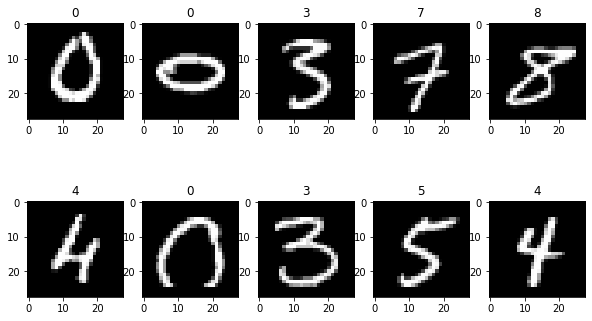

In [26]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    plt.imshow(X_test[rand_ind,:,:],cmap='gray')
    plt.title(mnist_list[int(y_test[rand_ind])])

## Format conversion

We now convert the format of the data. In the case of CNNs, and contrary to MLPs, the inputs are not simply vectors of arbitrary size. For example, in the case of images, it is important to distinguish the different dimensions (otherwise the network would not know how to carry out convolutions). Therefore, you need to carry out the following operation :

- reshape the input ```X_train```and ```X_test``` to a set of matrices of size (28,28) and depth 1 (grey-level), convert the data to float32 and normalize them in the range [0,1]. The final dimensions of the image data should be : [batch_size, height, width, n_channels]

Furthermore, as in the previous lab work, you must also convert the label vectors to matrices with k columns, where k is the number of classes. This allows us to carry out the cross-entropy for multi-class problems. Therefore :

- convert the output label ```y_train``` and ```y_test``` to one-hot encoding format.

In [27]:

# input image dimensions (mnist data is grey-level)
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], 1

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# number of classes
nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
There is 5000 train data
There is 5000 test data
28 28 1


# 1. CNN with tensorflow

We are now going to create a CNN with Tensorflow, and train it on the previously loaded CIFAR dataset.
- First define the input and output using ```tf.placeholder```
- Define the weights W1,b1,W2,b2 of the CNN using ```tf.get_variable```
    - We initialize them using ```tf.contrib.layers.xavier_initializer```(see https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer)
- Perform the convolution using ```tf.nn.conv2d``` 
- Apply the activation function using ```tf.nn.relu```
- Perform the max pooling using ```tf.nn.max_pool```
- Flatten the output of the convolution using ```tf.contrib.layers.flatten```
- Perform the Fully-Connected part using ```tf.contrib.layers.fully_connected```

Also, note that in Tensorflow, you can carry out the softmax + cross entropy all in one step with the following function :

- ```tf.nn.softmax_cross_entropy_with_logits()```

This has the advantage of being optimised and stabilised by the programmers who wrote Tensorflow, so that you do not have numerical problems.

In [0]:

learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# --- Size of the successive layers
n_h_0 = nb_channels
n_h_1 = nb_filters
n_h_2 = nb_filters

#size image
size_image_1,size_image_2=X_train.shape[1],X_train.shape[2]

In [0]:
tf.reset_default_graph()


# --- START CODE HERE

X_input = tf.placeholder(tf.float32,shape=[None,size_image_1,size_image_2,n_h_0])
Y_output = tf.placeholder(tf.float32,shape=[None,nb_classes])

# Kernels
# use initializer = tf.contrib.layers.xavier_initializer()
W1 = tf.get_variable("W1", shape=(*kernel_size, n_h_0, n_h_1), initializer=tf.contrib.layers.xavier_initializer() )
W2 = tf.get_variable("W2", shape=(*kernel_size, n_h_1, n_h_2), initializer=tf.contrib.layers.xavier_initializer())

# Biases
# initializer = tf.contrib.layers.xavier_initializer()
b1 = tf.get_variable("b1", shape=(n_h_1,), initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=(n_h_2,), initializer=tf.contrib.layers.xavier_initializer())

# Layer 1
Z1 = tf.nn.conv2d(X_input, filter=W1, strides=[1,1,1,1], padding="SAME") # convolution
A1 = tf.nn.relu(tf.nn.bias_add(Z1, b1)) # bias + relu

# Layer 2
Z2 = tf.nn.conv2d(A1, filter=W2, strides=[1,1,1,1], padding="SAME") # convolution
A2 =  tf.nn.relu(tf.nn.bias_add(Z2, b2)) # bias + relu

# Max Pooling
P2 = tf.nn.max_pool(A2, ksize=[2,2], strides=[1,2,2,1], padding="SAME") # max pool

# Flattening
P2 = tf.contrib.layers.flatten(P2) # flatten

CNN_output = tf.contrib.layers.fully_connected(P2, nb_classes,activation_fn=None) # fully connected (note, do not use a non-linearity here, this is done in the next line)
# --- END CODE HERE


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = CNN_output, labels = Y_output))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

## Train the model

Cost after epoch 0: 0.702442
Cost after epoch 1: 0.236358
Cost after epoch 2: 0.154715
Cost after epoch 3: 0.109503
Cost after epoch 4: 0.069083
Cost after epoch 5: 0.062788
Cost after epoch 6: 0.063886
Cost after epoch 7: 0.043113
Cost after epoch 8: 0.039786
Cost after epoch 9: 0.044564


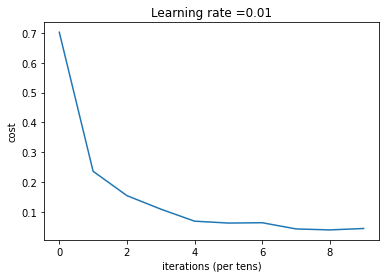

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9892
Test Accuracy: 0.9396
Visual results : 


No handles with labels found to put in legend.


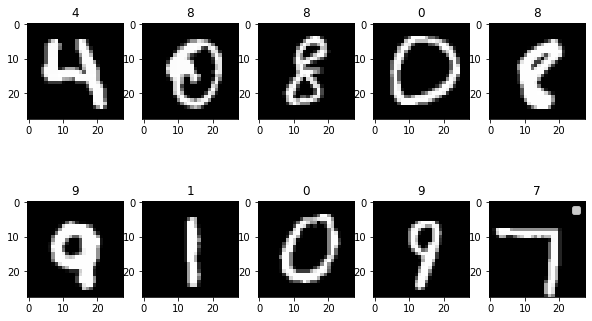

In [30]:
init = tf.global_variables_initializer()
n_batches = int(np.ceil(X_train.shape[0] / float(batch_size)))
costs = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        minibatch_cost = 0.
        for batch_idx in range(n_batches):
            # FILL IN CODE HERE
            # create batches
            debut = batch_idx * batch_size
            fin = debut + batch_size
            # carry out a step of optimisation and calculate the current cost
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X_input: X_train[debut: fin,:,:,:], Y_output: Y_train[debut: fin,:]})
            minibatch_cost += temp_cost / n_batches

        if epoch % 1 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
        costs.append(minibatch_cost) 
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Calculate the correct predictions
    predict_op = tf.argmax(CNN_output, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y_output, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X_input: X_train, Y_output: Y_train})
    test_accuracy = accuracy.eval({X_input: X_test, Y_output: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    print("Visual results : ")
    
    plt.figure(figsize=(10, 6))
    for idx in range(0,10):
        plt.subplot(2, 5, idx+1)
        rand_ind = np.random.randint(0,X_test.shape[0])
        y_classif = sess.run([CNN_output], feed_dict={X_input: np.expand_dims(X_test[rand_ind,:,:,:],axis=0)})

        predicted_class = np.argmax(np.squeeze(y_classif))
        plt.imshow(X_test[rand_ind,:,:].squeeze(),cmap='gray')
        plt.title(str(mnist_list[int(predicted_class)]))
    plt.legend()
    plt.show()


## 1.1 Carry out the CNN on CIFAR10

We are now going to train the same network architecture on a more difficult dataset : CIFAR10

First, we import the CIFAR10 data and carry out some pre-processing :

In [31]:
## Import the CIFAR10 data and carry out some pre-processing
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# input image dimensions
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], X_train.shape[3]

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)


# the CIFAR10 categories
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
n_classes=len(cifar_10_list)
#modify the number of input channels 
n_h_0 = nb_channels
# add more epochs
n_epochs = 30


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


Now, we are also going to restrict the data size for computational purposes

In [32]:
max_data = 10000
X_train = X_train[0:max_data,:,:,:]
X_test =  X_test[0:max_data,:,:,:]
Y_train = Y_train[0:max_data,:]
Y_test =  Y_test[0:max_data,:]
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


X_train shape: (10000, 32, 32, 3)
Y_train shape: (10000, 10)


### Display some of the images

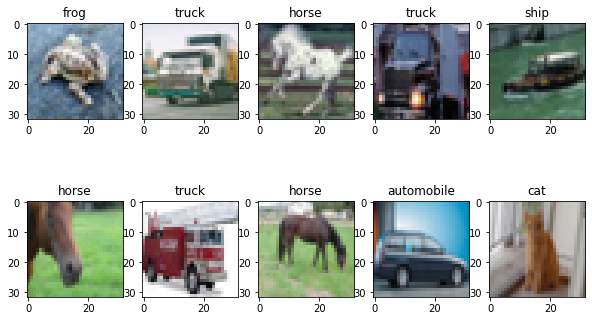

In [33]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    plt.imshow(X_test[rand_ind,:,:],cmap='gray')
    plt.title(cifar_10_list[int(y_test[rand_ind])])

## Define the architecture again, for CIFAR10

In this case, we are going to add a layer because the data is more complex. Therefore, we use the following architecture :

    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)

In [0]:

learning_rate = 0.01
n_epochs = 50
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)


# --- Size of the successive layers
n_h_0 = nb_channels
n_h_1 = nb_filters
n_h_2 = nb_filters
n_h_3 = nb_filters

#size image
size_image_1,size_image_2=X_train.shape[1],X_train.shape[2]

Now, modify the previous code (you can copy/paste/modify the necessary parts) to carry out the training on CIFAR10.

In [0]:
tf.reset_default_graph()

X_input = tf.placeholder(tf.float32,shape=[None,size_image_1,size_image_2,n_h_0])
Y_output = tf.placeholder(tf.float32,shape=[None,nb_classes])

# Kernels
# use initializer = tf.contrib.layers.xavier_initializer()
W1 = tf.get_variable("W1", shape=(*kernel_size, n_h_0, n_h_1), initializer=tf.contrib.layers.xavier_initializer() )
W2 = tf.get_variable("W2", shape=(*kernel_size, n_h_1, n_h_2), initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", shape=(*kernel_size, n_h_2, n_h_3), initializer=tf.contrib.layers.xavier_initializer())

# Biases
# initializer = tf.contrib.layers.xavier_initializer()
b1 = tf.get_variable("b1", shape=(n_h_1,), initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=(n_h_2,), initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape=(n_h_3,), initializer=tf.contrib.layers.xavier_initializer())

# Layer 1
Z1 = tf.nn.conv2d(X_input, filter=W1, strides=[1,1,1,1], padding="SAME") # convolution
A1 = tf.nn.relu(tf.nn.bias_add(Z1, b1)) # bias + relu

# Layer 2
Z2 = tf.nn.conv2d(A1, filter=W2, strides=[1,1,1,1], padding="SAME") # convolution
A2 =  tf.nn.relu(tf.nn.bias_add(Z2, b2)) # bias + relu

# Max Pooling
P2 = tf.nn.max_pool(A2, ksize=[2,2], strides=[1,2,2,1], padding="SAME") # max pool

# Layer 3
Z3 = tf.nn.conv2d(P2, filter=W2, strides=[1,1,1,1], padding="SAME") # convolution
A3 =  tf.nn.relu(tf.nn.bias_add(Z3, b3)) # bias + relu

# Max Pooling
P3 = tf.nn.max_pool(A3, ksize=[2,2], strides=[1,2,2,1], padding="SAME") # max pool

# Flattening
Pflat = tf.contrib.layers.flatten(P3) # flatten

CNN_output = tf.contrib.layers.fully_connected(Pflat, nb_classes,activation_fn=None) # fully connected (note, do not use a non-linearity here, this is done in the next line)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = CNN_output, labels = Y_output))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Cost after epoch 0: 2.045541
Cost after epoch 1: 1.774613
Cost after epoch 2: 1.646860
Cost after epoch 3: 1.534898
Cost after epoch 4: 1.464188
Cost after epoch 5: 1.382884
Cost after epoch 6: 1.340465
Cost after epoch 7: 1.312057
Cost after epoch 8: 1.258556
Cost after epoch 9: 1.256427
Cost after epoch 10: 1.228125
Cost after epoch 11: 1.188965
Cost after epoch 12: 1.174968
Cost after epoch 13: 1.159918
Cost after epoch 14: 1.149544
Cost after epoch 15: 1.113294
Cost after epoch 16: 1.123152
Cost after epoch 17: 1.126937
Cost after epoch 18: 1.134877
Cost after epoch 19: 1.153900
Cost after epoch 20: 1.099943
Cost after epoch 21: 1.079836
Cost after epoch 22: 1.061974
Cost after epoch 23: 1.048627
Cost after epoch 24: 1.024157
Cost after epoch 25: 1.014871
Cost after epoch 26: 1.034182
Cost after epoch 27: 1.073767
Cost after epoch 28: 1.067271
Cost after epoch 29: 1.065515
Cost after epoch 30: 1.031376
Cost after epoch 31: 1.011624
Cost after epoch 32: 1.028471
Cost after epoch 33:

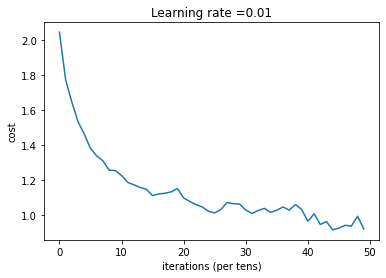

Tensor("Mean_2:0", shape=(), dtype=float32)


No handles with labels found to put in legend.


Train Accuracy: 0.6613
Test Accuracy: 0.4422
Visual results : 


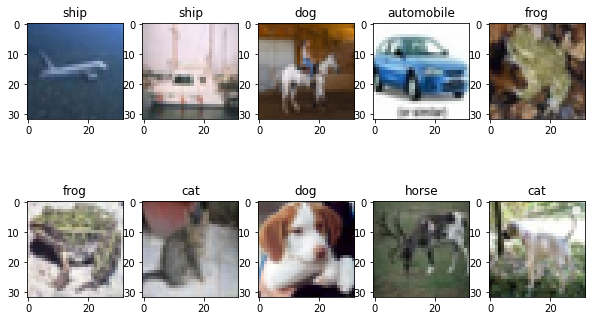

In [41]:
init = tf.global_variables_initializer()
n_batches = int(np.ceil(X_train.shape[0] / float(batch_size)))
costs = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        minibatch_cost = 0.
        for batch_idx in range(n_batches):
            # FILL IN CODE HERE
            # create batches
            debut = batch_idx * batch_size
            fin = debut + batch_size
            # carry out a step of optimisation and calculate the current cost
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X_input: X_train[debut: fin,:,:,:], Y_output: Y_train[debut: fin,:]})
            minibatch_cost += temp_cost / n_batches

        if epoch % 1 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
        costs.append(minibatch_cost) 
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Calculate the correct predictions
    predict_op = tf.argmax(CNN_output, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y_output, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X_input: X_train, Y_output: Y_train})
    test_accuracy = accuracy.eval({X_input: X_test, Y_output: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    print("Visual results : ")
    
    plt.figure(figsize=(10, 6))
    for idx in range(0,10):
        plt.subplot(2, 5, idx+1)
        rand_ind = np.random.randint(0,X_test.shape[0])
        y_classif = sess.run([CNN_output], feed_dict={X_input: np.expand_dims(X_test[rand_ind,:,:,:],axis=0)})

        predicted_class = np.argmax(np.squeeze(y_classif))
        plt.imshow(X_test[rand_ind,:,:].squeeze(),cmap='gray')
        plt.title(cifar_10_list[int(predicted_class)])
    plt.legend()
    plt.show()


 What do you think about the results (better or worse than MNIST) ? Why do you think this is ? How could you improve the results ?
 
 ---
 __Reponse :__
 
 Les résultats sont beaucoup moins bons que ceux obtenus aves MNIST. En effet, MNIST est réputée pour être facile à classifier, mais les images de CIFAR 10 sont aussi beaucoup plus complexes à analyser. En effet, les images sont de piètre qualité, et même à l'oeil humain il est parfois difficile de deviner ce qui se trouve sur l'image. 
Pour améliorer les résultats, on pourrait augmenter la qualité des images, faire une recherche plus approfondie pour obtenir les meilleurs hyper-paramètres, approfondir encore notre réseau de neurones, réduire le nombre de classes d'objets (faire une classe "animaux", une classe "moyens de transports" par exemple)...

---

You have probably seen that the Tensorflow interface is slightly complicated to use. To see how this is done in a simpler manner with Keras, please move on to part 2 of the TP.